# Midterm Project | Machine Learning Zoom Camp | predict-term deposit

List of contents:

1. Problem description in brief
2. Getting the dataset
3. Reading the dataset with pandas

### 1. Problem Description in brief

### 2. Getting the dataset

- link to dataset: [https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit](https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit)

            or,

- [https://raw.githubusercontent.com/bhasarma/mlcoursezoom-camp/main/WK08-09-midterm-project/predict-term-deposit-data.csv](https://raw.githubusercontent.com/bhasarma/mlcoursezoom-camp/main/WK08-09-midterm-project/predict-term-deposit-data.csv)

You can download the dataset into your local directory with `wget` 

In [1]:
data = 'https://raw.githubusercontent.com/bhasarma/mlcoursezoom-camp/main/WK08-09-midterm-project/predict-term-deposit-data.csv'

In [2]:
!wget $data  #uncomment it, if you haven't downoaded data already.

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [3]:
ls

model.bin       predict.py                     README.md  train.py
notebook.ipynb  predict-term-deposit-data.csv  report.md


### 3. Reading the dataset with pandas 

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('predict-term-deposit-data.csv')

In [6]:
df.head().T

,0,1,2,3,4
Id,1001,1002,1003,1004,1005
age,999.0,44.0,33.0,47.0,33.0
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143.0,29.0,2.0,1506.0,1.0
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown


In [7]:
df.shape

(45211, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


### 4. Data Preparation 

1. make all features and data look consistent, i.e. all small letters and use underscore if separation between two words are there
2. does data types of the features make sense, e.g. age should be integer and not a string

>Note: any other feature engineering will be done after splitting

In [9]:
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
id,1001,1002,1003,1004,1005
age,999.0,44.0,33.0,47.0,33.0
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143.0,29.0,2.0,1506.0,1.0
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown


Name of columns are made consistent and there is no issue of having empty space between variable names etc.

**to do:**

- remove `id` feature, since a customer id given by the bank, has *logically* no influence on the outcome
- categorical variables has to be converted with One Hot Encoding (only on train part, after splitting? check notes to be sure)
- `yes` or `no` columns to be converted into 1 and 0s
- find a way to take care of day and month columns in some way.
- what to do with `-1` values in feature `pdays`
- know the difference between `poutcome` and `y` features

In [10]:
df.isnull().sum()

id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.nunique()

id           45211
age             79
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
y                2
dtype: int64

In [12]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [13]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**converting days and months into day of year**

In [14]:
df['day'] = df['day'].map(str)

type(df['day'][10])

str

In [15]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [16]:
month_mapping = {
    'jan': '1',
    'feb': '2',
    'mar': '3',
    'apr': '4',
    'may': '5',
    'jun': '6',
    'jul': '7', 
    'aug': '8', 
    'sep': '9',
    'oct': '10', 
    'nov': '11', 
    'dec': '12' 
}
df['month'] = df['month'].map(month_mapping)
df.month.unique()

array(['5', '6', '7', '8', '10', '11', '12', '1', '2', '3', '4', '9'],
      dtype=object)

In [17]:
type(df.month[100])

str

In [18]:
df['date_formatted'] = pd.to_datetime(
    dict(         
        year='2025',
        month=df['month'], 
        day=df['day']
    )
)
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,date_formatted
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,5,261,1,-1,0,unknown,no,2025-05-05
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,5,151,1,-1,0,unknown,no,2025-05-05
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,2025-05-05
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,5,92,1,-1,0,unknown,no,2025-05-05
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,5,198,1,-1,0,unknown,no,2025-05-05


In [19]:
df['day_of_year']=df['date_formatted'].dt.dayofyear
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,date_formatted,day_of_year
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,5,261,1,-1,0,unknown,no,2025-05-05,125
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,5,151,1,-1,0,unknown,no,2025-05-05,125
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,2025-05-05,125
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,5,92,1,-1,0,unknown,no,2025-05-05,125
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,5,198,1,-1,0,unknown,no,2025-05-05,125


In [20]:
df.day_of_year.unique()

array([125, 126, 127, 128, 129, 132, 133, 134, 135, 136, 139, 140, 141,
       143, 146, 147, 148, 149, 150, 153, 154, 155, 156, 157, 160, 162,
       163, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 181, 182,
       183, 184, 185, 188, 189, 190, 191, 192, 195, 196, 197, 198, 199,
       202, 203, 204, 205, 206, 209, 210, 211, 212, 216, 217, 218, 219,
       220, 223, 224, 225, 226, 230, 231, 232, 233, 234, 237, 238, 239,
       240, 241, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 308, 309, 310, 312, 313, 314, 315, 316, 317,
       318, 321, 322, 323, 324, 325, 326, 331, 338, 339, 341, 342, 343,
       345, 346, 347, 356, 361,  28,  29,  30,  33,  34,  35,  36,  37,
        40,  41,  42,  43,  44,  47,  48,  49,  50,  57,  58,  61,  62,
        63,  64,  65,  68,  69,  70,  71,  72,  75,  76,  77,  78,  79,
        82,  83,  84,  85,  86,  89,  90,  91,  92,  93,  96,  97,  98,
        99, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 11

In [21]:
df = df.drop(columns = ['id','day','month','date_formatted'])
df.dtypes

age            float64
job             object
marital         object
education       object
default         object
balance        float64
housing         object
loan            object
contact         object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
day_of_year      int64
dtype: object

Before splitting, we still need to convert yes-no columns i.e. (`default`,`housing` and `loan`) into 1s and 0s.
I think all yes-no cols will be converted into numerical one in OHE. I don't have to do it now. I just have to do it for the target variable. 

In [22]:
df.y = (df.y == 'yes').astype(int)
df.default = (df.default == 'yes').astype(int)
df.housing = (df.housing == 'yes').astype(int)
df.loan = (df.loan == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,day_of_year
0,999.0,management,married,tertiary,0,2143.0,1,0,unknown,261,1,-1,0,unknown,0,125
1,44.0,technician,single,secondary,0,29.0,1,0,unknown,151,1,-1,0,unknown,0,125
2,33.0,entrepreneur,married,secondary,0,2.0,1,1,unknown,76,1,-1,0,unknown,0,125
3,47.0,blue-collar,married,unknown,0,1506.0,1,0,unknown,92,1,-1,0,unknown,0,125
4,33.0,unknown,single,unknown,0,1.0,0,0,unknown,198,1,-1,0,unknown,0,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,0,825.0,0,0,cellular,977,3,-1,0,unknown,1,321
45207,71.0,retired,divorced,primary,0,1729.0,0,0,cellular,456,2,-1,0,unknown,1,321
45208,72.0,retired,married,secondary,0,5715.0,0,0,cellular,1127,5,184,3,success,1,321
45209,57.0,blue-collar,married,secondary,0,668.0,0,0,telephone,508,4,-1,0,unknown,0,321


### 5. splitting the data (creatinng the validation framework)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [26]:
df_train = df_train.reset_index(drop = True)
df_val   = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_train.reset_index(drop = True)

In [27]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
y_full_train = df_full_train.y.values

In [28]:
del df_train['y']
del df_val['y']
del df_test['y']
#del df_full_train['y'] remember to do it later, after EDA

In [29]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year
0,39.0,unemployed,married,primary,0,590.0,1,0,cellular,190,2,-1,0,unknown,35
1,53.0,management,divorced,secondary,0,1355.0,0,1,cellular,447,2,196,8,other,35
2,53.0,services,divorced,primary,0,0.0,0,1,cellular,206,1,-1,0,unknown,189
3,35.0,technician,married,tertiary,0,1473.0,1,0,unknown,84,3,-1,0,unknown,132
4,53.0,unemployed,divorced,tertiary,0,0.0,1,1,cellular,140,2,-1,0,unknown,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,31.0,student,single,unknown,0,2882.0,1,0,cellular,158,2,-1,0,unknown,126
27122,39.0,management,married,tertiary,0,5060.0,1,0,cellular,157,4,-1,0,unknown,232
27123,30.0,blue-collar,married,primary,0,935.0,1,0,cellular,96,2,-1,0,unknown,36
27124,35.0,management,married,tertiary,0,2123.0,1,0,cellular,249,3,-1,0,unknown,202


### 6. EDA on training data

The idea is not to do any EDA on validation or test dataset treating them as if I don't know anything about them. But if there is something such as missing values in train set replaced with zero, it will be done to test and validation set as well.

In [30]:
df_train.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,day_of_year
count,27122.000000,27126.000000,27125.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000,27126.000000
mean,40.902773,0.017437,1347.000406,0.557288,0.160805,259.155497,2.762368,40.633783,0.590504,171.309334
std,12.102878,0.130896,3008.582709,0.496716,0.367358,258.811857,3.101016,100.351285,2.513575,74.882706
min,-1.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,6.000000
25%,33.000000,0.000000,71.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,129.000000
50%,39.000000,0.000000,447.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,156.000000
75%,48.000000,0.000000,1416.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,217.000000
max,999.000000,1.000000,102127.000000,1.000000,1.000000,3881.000000,63.000000,854.000000,275.000000,365.000000


In [31]:
df_train.shape

(27126, 15)

**6.1 80% of datas in `pdays` are `-1`. I have to do something about it. I can't remove the rows.**

Possible options:

1. Replace `-1` with a very large number e.g. 999999 which will have the same effect as if they are not being contacted for a long time, which is same as not-contacting at all 
2. Remove the column entirely

Here I try with first option.

In [32]:
df_train['pdays'] = df_train['pdays'].replace([-1], 999999999)
df_test['pdays'] = df_test['pdays'].replace([-1], 999999999)
df_val['pdays'] = df_val['pdays'].replace([-1], 999999999)
df_full_train['pdays'] = df_full_train['pdays'].replace([-1], 999999999)

In [33]:
df_train['pdays']

0        999999999
1              196
2        999999999
3        999999999
4        999999999
           ...    
27121    999999999
27122    999999999
27123    999999999
27124    999999999
27125    999999999
Name: pdays, Length: 27126, dtype: int64

**6.2 Dealing with missing values or extremely large (illogical) values**

options:
1. fill with zeo, mean or median

In [34]:
df_train.isnull().sum()

age            4
job            0
marital        0
education      0
default        0
balance        1
housing        0
loan           0
contact        0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
day_of_year    0
dtype: int64

In [35]:
df_train['age'] = df_train['age'].fillna(df_train['age'].mode()[0])
df_val['age'] = df_val['age'].fillna(df_val['age'].mode()[0])
df_test['age'] = df_test['age'].fillna(df_test['age'].mode()[0])
df_full_train['age'] = df_full_train['age'].fillna(df_full_train['age'].mode()[0])

df_train['balance'] = df_train['balance'].fillna(df_train['balance'].mode()[0])
df_val['balance'] = df_val['balance'].fillna(df_val['balance'].mode()[0])
df_test['balance'] = df_test['balance'].fillna(df_test['balance'].mode()[0])
df_full_train['balance'] = df_full_train['balance'].fillna(df_full_train['balance'].mode()[0])

In `df_train.describe()` above we see that there is age in 999 years and -1. Let's see how many of them are like that.

In [36]:
df_train.age.min()

-1.0

In [37]:
df_train.age.max()

999.0

/home/bsarma/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


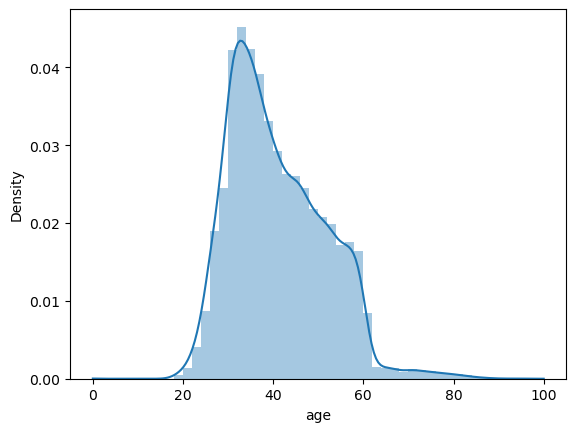

In [38]:
sns.distplot(df_train['age'], kde=True, hist=True, kde_kws={"clip":(0,100)}, hist_kws={"range":(0,100)})
plt.show()

In [39]:
(df.age.values == 999).sum()

1

In [40]:
(df.age.values == -1).sum()

3

In [41]:
(df.age.values > 100).sum()

1

In [42]:
(df.age.values < 15).sum()

3

Thus, we have 1 value 999 and only 3 values -1. All other values makes sense. So we'll replace them with mode of age.

In [43]:
df_train['age'].mode()[0]

32.0

In [44]:
df_train['age'] = df_train['age'].replace([-1, 999], df_train['age'].mode()[0])
df_val['age'] = df_val['age'].replace([-1, 999], df_val['age'].mode()[0])
df_test['age'] = df_test['age'].replace([-1, 999], df_test['age'].mode()[0])
df_full_train['age'] = df_full_train['age'].replace([-1, 999], df_full_train['age'].mode()[0])

In [45]:
(df_train.age.values == -1).sum()

0

### 6.3 EDA: inspecting features with histogram

In [46]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'day_of_year'],
      dtype='object')

In [47]:
df_train.dtypes

age            float64
job             object
marital         object
education       object
default          int64
balance        float64
housing          int64
loan             int64
contact         object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
day_of_year      int64
dtype: object

In [48]:
cols_numerical = list(df_train.select_dtypes(include='number').columns)
cols_categorical = list(df_train.select_dtypes(exclude='number').columns)
cols_numerical

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'day_of_year']

/tmp/ipykernel_5958/4096612376.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train.hist(bins=100, ax=ax, layout=(5, 2), column=cols_numerical)


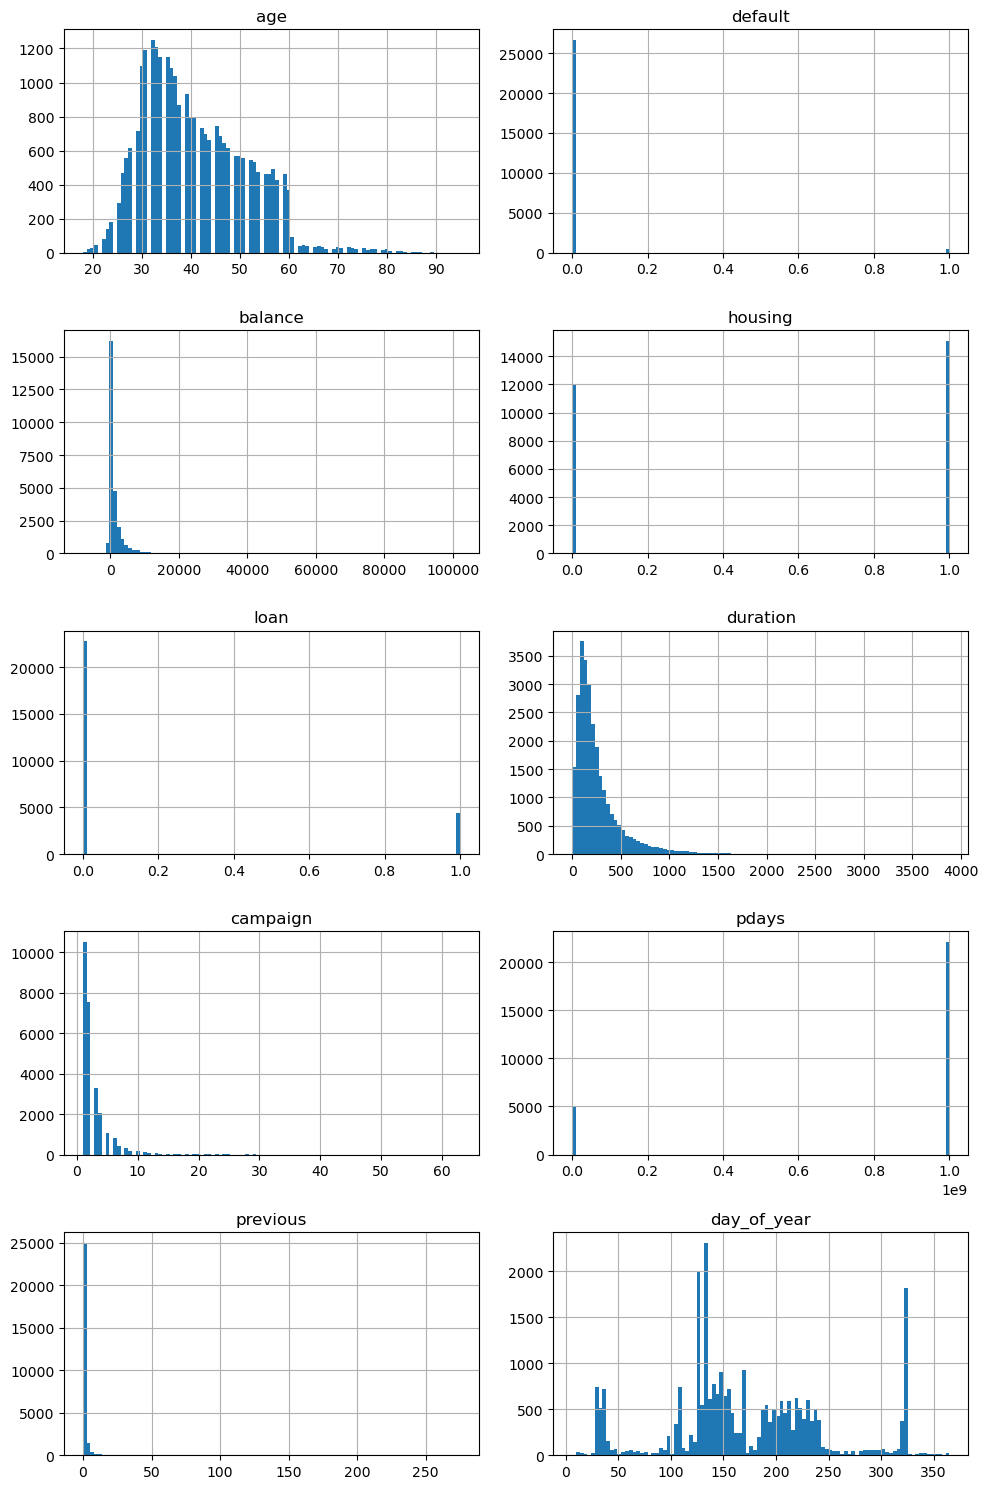

In [49]:
fig = plt.figure(figsize=(10,15))
ax = plt.gca()
df_train.hist(bins=100, ax=ax, layout=(5, 2), column=cols_numerical)
plt.tight_layout()
plt.show()

### 6.4 EDA: success rate

In [50]:
global_success_rate = y_train.mean().round(3)
global_success_rate

0.117

**Thus, 11.7% is the global success rate.**

In [51]:
cols_categorical

['job', 'marital', 'education', 'contact', 'poutcome']

In [52]:
df_train[cols_categorical].nunique()

job          12
marital       3
education     4
contact       3
poutcome      4
dtype: int64

In [53]:
df_full_train[cols_categorical].nunique()

job          12
marital       3
education     4
contact       3
poutcome      4
dtype: int64

In [54]:
df_full_train.marital.value_counts(normalize=True)

married     0.602964
single      0.282275
divorced    0.114761
Name: marital, dtype: float64

Thus 60% of customrs are married, 28.2% are single and 11.4% are divorced.

In [55]:
success_rate_married = round(df_full_train[df_full_train.marital=='married'].y.mean(),3)
success_rate_single = round(df_full_train[df_full_train.marital=='single'].y.mean(),3)
success_rate_divorced = round(df_full_train[df_full_train.marital=='divorced'].y.mean(),3)
print(success_rate_married, success_rate_single, success_rate_divorced)

0.104 0.144 0.119


Thus, success rate for bank among singles (14.4%) are the highest and it is above global success rate of 11.7%.  

In [56]:
df_full_train.education.value_counts(normalize=True)

secondary    0.512313
tertiary     0.294035
primary      0.151478
unknown      0.042174
Name: education, dtype: float64

50% of the customers are with secondary education.

In [57]:
success_rate_secondary = round(df_full_train[df_full_train.education=='secondary'].y.mean(),3)
success_rate_tertiary = round(df_full_train[df_full_train.education=='tertiary'].y.mean(),3)
success_rate_primary = round(df_full_train[df_full_train.education=='primary'].y.mean(),3)
success_rate_unknown = round(df_full_train[df_full_train.education=='unknown'].y.mean(),3)
print(success_rate_secondary, success_rate_tertiary, success_rate_primary, success_rate_unknown)

0.104 0.151 0.09 0.136


Here success rate among tertiary (15.1%) and unknown group (13.6%) is higher than globla average of 11%.

In [58]:
df_full_train.contact.value_counts(normalize=True)

cellular     0.650741
unknown      0.285077
telephone    0.064182
Name: contact, dtype: float64

Bank contact 65% of the customers with cellular, while only 6% are with telephone.

In [59]:
success_rate_cellular = round(df_full_train[df_full_train.contact=='cellular'].y.mean(),3)
success_rate_telephone = round(df_full_train[df_full_train.contact=='telephone'].y.mean(),3)
success_rate_unknown_contact = round(df_full_train[df_full_train.contact=='unknown'].y.mean(),3)

print(success_rate_cellular, success_rate_telephone, success_rate_unknown_contact)

0.148 0.13 0.043


Both cellular (14.8%) and telephone (13%) has higher success rate than global (11%).

In [60]:
df_full_train.poutcome.value_counts(normalize=True)

unknown    0.814680
failure    0.110300
other      0.041436
success    0.033584
Name: poutcome, dtype: float64

In [61]:
round(df_full_train.job.value_counts(normalize=True),3)

blue-collar      0.214
management       0.211
technician       0.168
admin.           0.114
services         0.093
retired          0.049
self-employed    0.034
entrepreneur     0.033
unemployed       0.030
housemaid        0.027
student          0.021
unknown          0.006
Name: job, dtype: float64

Highest percentage of customers are blue-collar(21.4%) and management(21.1%) workers.

In [62]:
success_rate_blue_collar = round(df_full_train[df_full_train.job=='blue-collar'].y.mean(),3)
success_rate_management = round(df_full_train[df_full_train.job=='management'].y.mean(),3)
success_rate_technician = round(df_full_train[df_full_train.job=='technician'].y.mean(),3)
success_rate_admin = round(df_full_train[df_full_train.job=='admin.'].y.mean(),3)
print(success_rate_blue_collar,success_rate_management, success_rate_technician, success_rate_admin)

0.075 0.137 0.112 0.118


### 6.5 EDA: Success ratio

In [63]:
from IPython.display import display

In [64]:
for c in cols_categorical:
    print(c)
    df_group = df_full_train.groupby(c).y.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_success_rate
    df_group['success'] = df_group['mean'] / global_success_rate
    display(df_group)
    print()
    print()

job


,mean,count,diff,success
job,,,,
admin.,0.118425,3099,0.001425,1.012182
blue-collar,0.074673,5812,-0.042327,0.638232
entrepreneur,0.090100,899,-0.026900,0.770086
housemaid,0.095890,730,-0.021110,0.819576
management,0.136888,5720,0.019888,1.169984
retired,0.230308,1333,0.113308,1.968441
self-employed,0.112069,928,-0.004931,0.957854
services,0.081543,2514,-0.035457,0.696952
student,0.288225,569,0.171225,2.463461




marital


,mean,count,diff,success
marital,,,,
divorced,0.119178,3113,0.002178,1.018612
married,0.103876,16356,-0.013124,0.887831
single,0.144182,7657,0.027182,1.232323




education


,mean,count,diff,success
education,,,,
primary,0.090046,4109,-0.026954,0.769626
secondary,0.103835,13897,-0.013165,0.887482
tertiary,0.151078,7976,0.034078,1.291267
unknown,0.136364,1144,0.019364,1.165501




contact


,mean,count,diff,success
contact,,,,
cellular,0.148312,17652,0.031312,1.267622
telephone,0.130385,1741,0.013385,1.114400
unknown,0.042545,7733,-0.074455,0.363632




poutcome


,mean,count,diff,success
poutcome,,,,
failure,0.127005,2992,0.010005,1.085516
other,0.157473,1124,0.040473,1.345926
success,0.636663,911,0.519663,5.441564
unknown,0.092176,22099,-0.024824,0.787830


### 6.6 EDA: Feature importance -  mutual information  (for categorical variables)

In [84]:
from sklearn.metrics import mutual_info_score

In [85]:
def mutual_info_success_score(series):
    return mutual_info_score(series, df_full_train.y)

In [86]:
mutual_info = df_full_train[cols_categorical].apply(mutual_info_success_score)
mutual_info.sort_values(ascending=False)

poutcome     0.028336
contact      0.012758
job          0.008243
education    0.002622
marital      0.001471
dtype: float64

In [88]:
df_train.poutcome.value_counts()

unknown    22099
failure     2992
other       1124
success      911
Name: poutcome, dtype: int64

Thus `poutcome` i.e. outcome of previous marketing campaign and `contact` are the most important variables.

### 6.7 EDA: Correlation (for numerical variables)

In [90]:
corrM = df_train.corr()
corrM

,age,default,balance,housing,loan,duration,campaign,pdays,previous,day_of_year
age,1.000000,-0.014403,0.094194,-0.189895,-0.019851,-0.000036,0.006177,0.001471,-0.001786,0.084940
default,-0.014403,1.000000,-0.067350,-0.007710,0.079688,-0.003535,0.018655,0.038921,-0.016058,0.012004
balance,0.094194,-0.067350,1.000000,-0.069993,-0.086358,0.020785,-0.011062,-0.031318,0.013763,0.098433
housing,-0.189895,-0.007710,-0.069993,1.000000,0.038409,0.004651,-0.037091,-0.061461,0.036507,-0.180787
loan,-0.019851,0.079688,-0.086358,0.038409,1.000000,-0.014656,0.009209,0.031721,-0.012488,0.027736
duration,-0.000036,-0.003535,0.020785,0.004651,-0.014656,1.000000,-0.083102,0.000332,0.001283,-0.016470
campaign,0.006177,0.018655,-0.011062,-0.037091,0.009209,-0.083102,1.000000,0.110019,-0.034076,0.071874
pdays,0.001471,0.038921,-0.031318,-0.061461,0.031721,0.000332,0.110019,1.000000,-0.492393,0.057448
previous,-0.001786,-0.016058,0.013763,0.036507,-0.012488,0.001283,-0.034076,-0.492393,1.000000,-0.034443
day_of_year,0.084940,0.012004,0.098433,-0.180787,0.027736,-0.016470,0.071874,0.057448,-0.034443,1.000000


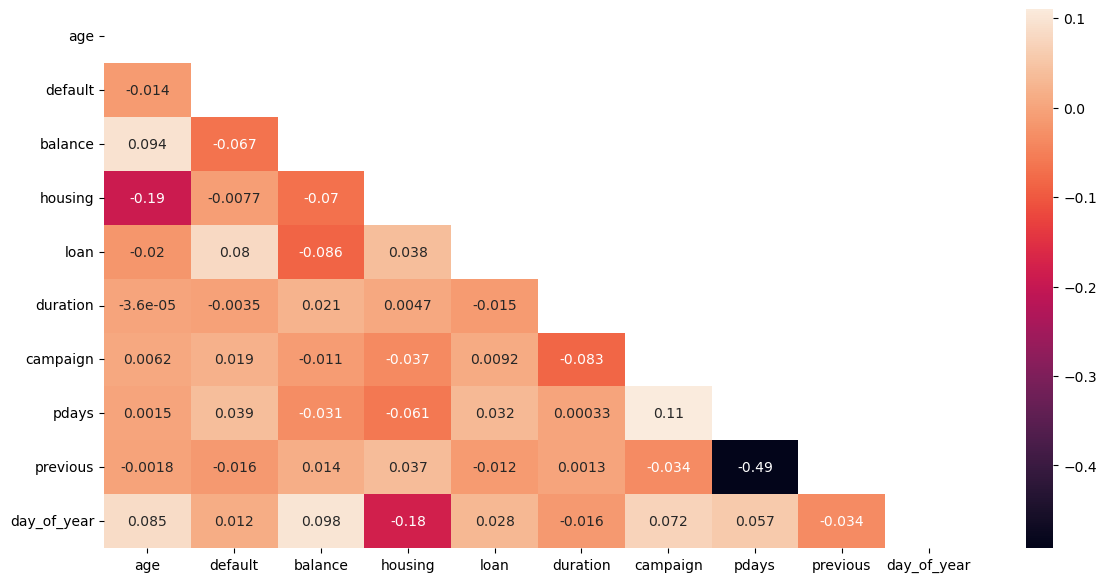

In [92]:
plt.figure(figsize=(14,7))
mask = np.zeros_like(corrM, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corrM[mask] = np.nan
sns.heatmap(corrM, annot=True)
plt.show()

- `previous` and `pdays` has the strongest correlation of `-0.49`. <br>

- `housing` and `age` has `-0.19` <br>

- `housing` and `day_of_year` has correlation coefficient of `-0.18`

## 7. Training

### 7.1 One hot encoding

In [101]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [102]:
train_dicts = df_train.to_dict(orient = 'records') #let's turn it into a dict
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts) #Onehot encoding done here

In [103]:
X_train.shape

(27126, 36)

In [104]:
df_train.shape

(27126, 15)

In [105]:
type(X_train)

numpy.ndarray

In [106]:
type(y_train)

numpy.ndarray

### 7.2 training first model: logistic regression

In [107]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [110]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [111]:
y_pred_prob = model.predict_proba(X_val)[:,1]
y_pred_prob

array([0.09209974, 0.09209974, 0.09209974, ..., 0.09209974, 0.09209974,
       0.09209974])

In [113]:
y_predict_binary = (y_pred >= 0.5).astype(int)
y_predict_binary

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
y_pred_binary

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
y_val

array([0, 1, 0, ..., 0, 0, 0])

In [116]:
accuracy = (y_pred_binary == y_val).mean()
round(accuracy,3)

0.882

Thus our model has 88% accuracy.

### 7.3 parameter tuning for logistic regression 

#### 7.3.1 tuning threshold

## 8. save the best model

In [81]:
import pickle

In [82]:
output_file = 'model.bin' #a nicer way of writing the previous line using f-strings
output_file

'model.bin'

In [83]:
with open(output_file,'wb') as f_out:
    pickle.dump((dv, model), f_out)

**to do:**
- [ ] Missing values:
- [ ] EDA:
- [ ] logistic regression: vary regularization parameter C in the model 
- [ ] logistic regression: vary threshold in the model
- [ ] logistic regression: try with k-fold cross validation
- [ ] logistic regression: try with different models
- [ ] logistic regression: look at auc score with auc=roc_auc_score(y_test,y_pred)
- [ ] Decision Trees:
- [ ] Random forest:
- [ ] XGboost:
- [ ] Select the best model
- [ ] save the best model
- [ ] load the best model